In [1]:
# -*- coding: utf-8 -*-
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt

matplotlib.rcParams['axes.unicode_minus'] = False

## MA(1)
___
${ \beta  }_{ 1 }=0.6$로 정하고 시계열을 생성해보자.
$${ x }_{ t }={ w }_{ t }+0.6{ w }_{ t-1 }$$

C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


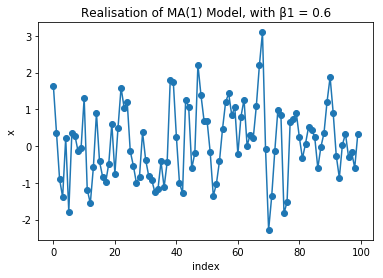

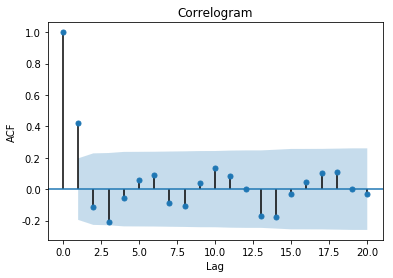

In [2]:
np.random.seed(1)
proc = sm.tsa.ArmaProcess([1], [1, 0.6])
samples = proc.generate_sample(100)

plt.plot(samples, 'o-')
plt.title("Realisation of MA(1) Model, with β1 = 0.6")
plt.xlabel("index")
plt.ylabel("x")
plt.show()

sm.graphics.tsa.plot_acf(samples, lags=20)
plt.title("Correlogram")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

위의 시계열로 β1을 추정해보자.

In [3]:
arma = sm.tsa.ARMA(samples, (0, 1))
ret = arma.fit(disp=False)
print(ret.summary())
print("\n데이터에서 β1의 추정: {0}".format(ret.maparams[0]))
print("\n추정된 계수의 신뢰구간(95%): {0}".format(ret.conf_int(alpha=0.05)[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 1)   Log Likelihood                -128.643
Method:                       css-mle   S.D. of innovations              0.874
Date:                Fri, 07 Sep 2018   AIC                            263.285
Time:                        23:05:29   BIC                            271.101
Sample:                             0   HQIC                           266.448
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1037      0.135      0.771      0.442      -0.160       0.367
ma.L1.y        0.5436      0.072      7.498      0.000       0.402       0.686
                                    Roots           

${ \beta  }_{ 1 }=-0.6$로 정하고 똑같이 해보자.
$${ x }_{ t }={ w }_{ t }-0.6{ w }_{ t-1 }$$

C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


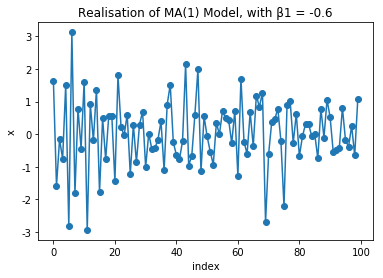

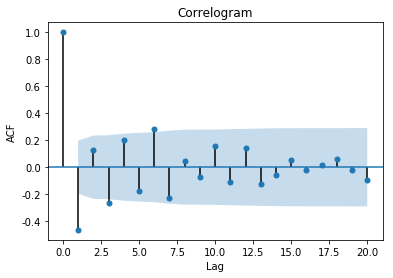

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 1)   Log Likelihood                -129.508
Method:                       css-mle   S.D. of innovations              0.881
Date:                Fri, 07 Sep 2018   AIC                            265.016
Time:                        23:05:30   BIC                            272.832
Sample:                             0   HQIC                           268.179
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0225      0.030      0.761      0.448      -0.035       0.080
ma.L1.y       -0.6722      0.078     -8.570      0.000      -0.826      -0.518
                                    Roots           

In [4]:
np.random.seed(1)
proc = sm.tsa.ArmaProcess([1], [1, -0.6])
samples = proc.generate_sample(100)

plt.plot(samples, 'o-')
plt.title("Realisation of MA(1) Model, with β1 = -0.6")
plt.xlabel("index")
plt.ylabel("x")
plt.show()

sm.graphics.tsa.plot_acf(samples, lags=20)
plt.title("Correlogram")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

arma = sm.tsa.ARMA(samples, (0, 1))
ret = arma.fit(disp=False)
print(ret.summary())
print("\n데이터에서 β1의 추정: {0}".format(ret.maparams[0]))
print("\n추정된 계수의 신뢰구간(95%): {0}".format(ret.conf_int(alpha=0.05)[1]))

## MA(3)
___
${ \beta  }_{ 1 }=0.6,{ \beta  }_{ 2 }=0.4,{ \beta  }_{ 3 }=0.3$로 정하고 시계열을 생성해보자.
$${ x }_{ t }={ w }_{ t }+0.6{ w }_{ t-1 }+0.4{ w }_{ t-2 }+0.3{ w }_{ t-3 }$$

C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


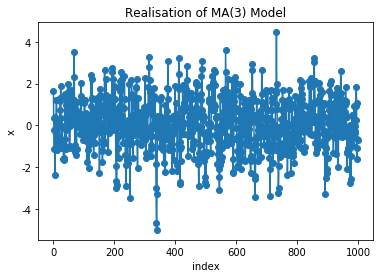

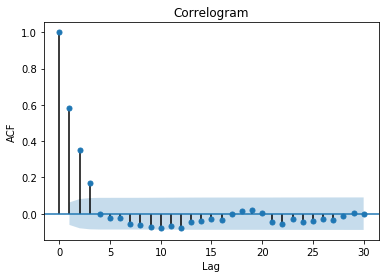

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 3)   Log Likelihood               -1396.964
Method:                       css-mle   S.D. of innovations              0.978
Date:                Fri, 07 Sep 2018   AIC                           2803.928
Time:                        23:05:30   BIC                           2828.467
Sample:                             0   HQIC                          2813.255
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0911      0.069      1.326      0.185      -0.044       0.226
ma.L1.y        0.5716      0.030     18.839      0.000       0.512       0.631
ma.L2.y        0.3993      0.033     11.986      0.0

In [5]:
np.random.seed(1)
proc = sm.tsa.ArmaProcess([1], [1, 0.6, 0.4, 0.3])
samples = proc.generate_sample(1000)

plt.plot(samples, 'o-')
plt.title("Realisation of MA(3) Model")
plt.xlabel("index")
plt.ylabel("x")
plt.show()

sm.graphics.tsa.plot_acf(samples, lags=30)
plt.title("Correlogram")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

arma = sm.tsa.ARMA(samples, (0, 3))
ret = arma.fit(disp=False)
print(ret.summary())
print("\n데이터에서 β1의 추정: {0}".format(ret.maparams[0]))
print("데이터에서 β2의 추정: {0}".format(ret.maparams[1]))
print("데이터에서 β3의 추정: {0}".format(ret.maparams[2]))
print("\n추정된 β1의 신뢰구간(95%): {0}".format(ret.conf_int(alpha=0.05)[1]))
print("추정된 β2의 신뢰구간(95%): {0}".format(ret.conf_int(alpha=0.05)[2]))
print("추정된 β3의 신뢰구간(95%): {0}".format(ret.conf_int(alpha=0.05)[3]))

## Financial Data - Amazon
___
아마존의 데이터를 MA(p)로 분석해보자.

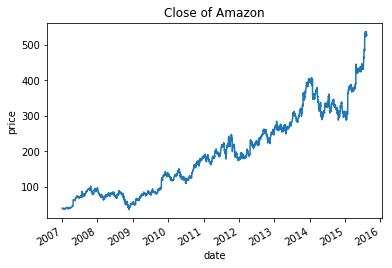

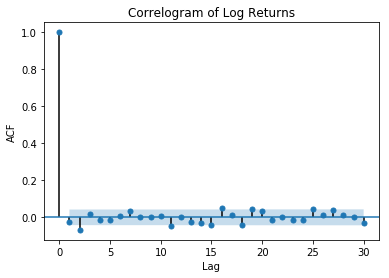

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)




======================================== MA(1) ========================================

                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 2168
Model:                     ARMA(0, 1)   Log Likelihood                4790.617
Method:                       css-mle   S.D. of innovations              0.027
Date:                Fri, 07 Sep 2018   AIC                          -9575.235
Time:                        23:05:31   BIC                          -9558.190
Sample:                             0   HQIC                         -9569.002
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0012      0.001      2.182      0.029       0.000       0.002
ma.L1.log_return    -0

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)




======================================== MA(3) ========================================

                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 2168
Model:                     ARMA(0, 3)   Log Likelihood                4795.981
Method:                       css-mle   S.D. of innovations              0.026
Date:                Fri, 07 Sep 2018   AIC                          -9581.963
Time:                        23:05:32   BIC                          -9553.555
Sample:                             0   HQIC                         -9571.574
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0012      0.001      2.300      0.022       0.000       0.002
ma.L1.log_return    -0

In [6]:
day_data = pd.read_csv("AMZN.csv")
day_data["Date"] = pd.to_datetime(day_data["Date"], format='%Y-%m-%d')
day_data = day_data.set_index("Date", inplace=False)

day_data["Close"].plot()
plt.title("Close of Amazon")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

day_data['log_return'] = np.log(day_data['Close']).diff()
day_data = day_data.dropna()

sm.graphics.tsa.plot_acf(day_data['log_return'], lags=30)
plt.title("Correlogram of Log Returns")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

arma = sm.tsa.ARMA(day_data['log_return'], (0, 1))
ret = arma.fit(disp=False)
print("\n\n=======================================================================================")
print("======================================== MA(1) ========================================\n")
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))

arma = sm.tsa.ARMA(day_data['log_return'], (0, 2))
ret = arma.fit(disp=False)
print("\n\n=======================================================================================")
print("======================================== MA(2) ========================================\n")
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))

arma = sm.tsa.ARMA(day_data['log_return'], (0, 3))
ret = arma.fit(disp=False)
print("\n\n=======================================================================================")
print("======================================== MA(3) ========================================\n")
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))

## Financial Data - S&P 500
___
S&P 500의 데이터를 MA(p)로 분석해보자.

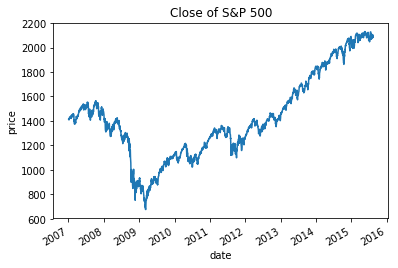

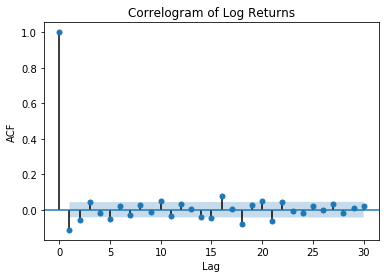

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)




======================================== MA(1) ========================================

                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 2168
Model:                     ARMA(0, 1)   Log Likelihood                6243.590
Method:                       css-mle   S.D. of innovations              0.014
Date:                Fri, 07 Sep 2018   AIC                         -12481.181
Time:                        23:05:33   BIC                         -12464.136
Sample:                             0   HQIC                        -12474.948
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0002      0.000      0.700      0.484      -0.000       0.001
ma.L1.log_return    -0

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)




======================================== MA(3) ========================================

                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 2168
Model:                     ARMA(0, 3)   Log Likelihood                6247.261
Method:                       css-mle   S.D. of innovations              0.014
Date:                Fri, 07 Sep 2018   AIC                         -12484.522
Time:                        23:05:33   BIC                         -12456.114
Sample:                             0   HQIC                        -12474.134
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0002      0.000      0.713      0.476      -0.000       0.001
ma.L1.log_return    -0

In [7]:
day_data = pd.read_csv("GSPC.csv")
day_data["Date"] = pd.to_datetime(day_data["Date"], format='%Y-%m-%d')
day_data = day_data.set_index("Date", inplace=False)

day_data["Close"].plot()
plt.title("Close of S&P 500")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

day_data['log_return'] = np.log(day_data['Close']).diff()
day_data = day_data.dropna()

sm.graphics.tsa.plot_acf(day_data['log_return'], lags=30)
plt.title("Correlogram of Log Returns")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

arma = sm.tsa.ARMA(day_data['log_return'], (0, 1))
ret = arma.fit(disp=False)
print("\n\n=======================================================================================")
print("======================================== MA(1) ========================================\n")
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))

arma = sm.tsa.ARMA(day_data['log_return'], (0, 2))
ret = arma.fit(disp=False)
print("\n\n=======================================================================================")
print("======================================== MA(2) ========================================\n")
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))

arma = sm.tsa.ARMA(day_data['log_return'], (0, 3))
ret = arma.fit(disp=False)
print("\n\n=======================================================================================")
print("======================================== MA(3) ========================================\n")
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))